<a href="https://colab.research.google.com/github/AleemRahil/Robust-End-to-End-E-Commerce-Analytics-Automation-with-LLMs/blob/main/Text_to_SQL_via_gbq_chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Robust Text-to-SQL With LangChain

This project helps data analysts, data scientists, and developers leverage LLMs for generating SQL queries from natural language questions, making complex data wrangling in BigQuery and other SQL databases more accessible and intuitive.

This notebook will explore how Large Language Models (LLMs) like GPT-4 work with Google BigQuery to make advanced data analysis more accessible. This tutorial is made to help developers and data scientists familiar with basic LLM concepts turn natural language questions into detailed SQL queries.

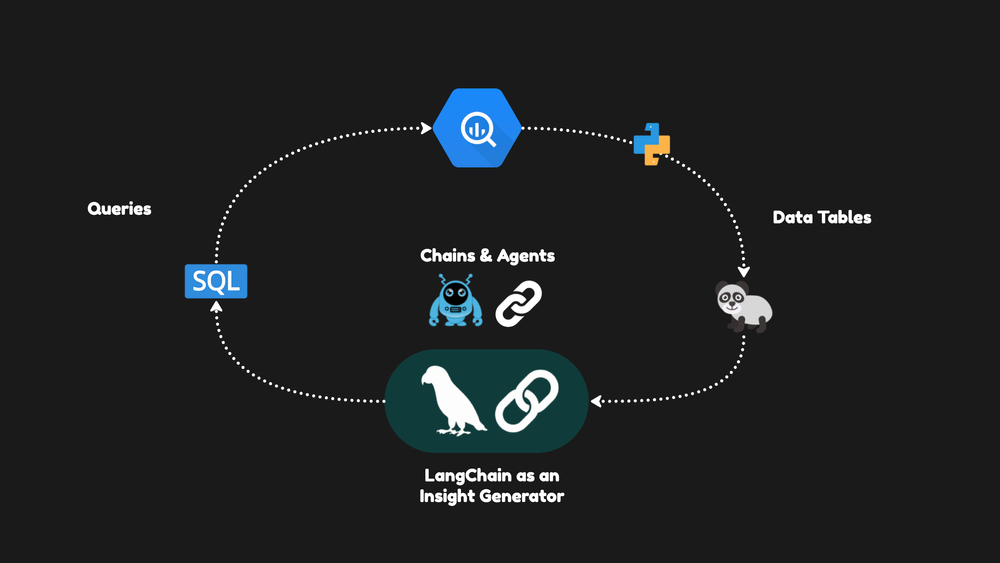

Here's what we will cover in this tutorial:

*   Connecting LLMs to BigQuery with LangChain
*   LangChain SQL Agents
*   LangChain SQL Agents
*   Managing Chat-to-SQL Risk
*   Robust Text-to-SQL For Data Analysts

#Connecting LLMs to BigQuery with LangChain

These packages serve distinct purposes:

*   python-dotenv manages environment variables, storing API keys securely.
*   langchain and langchain-openai integrate LLMs with data sources.
*   openai is the official library for OpenAI's API, including GPT models.
*   sqlalchemy, sqlalchemy-bigquery, and google-cloud-bigquery handle database interactions.

Next, configure access to the OpenAI API:

Store your OpenAI API key in a .env file at the project's root.
Import the API key into your Python environment:

In [ ]:
!pip install -qU \
  python-dotenv \
  langchain \
  anthropic \
  openai \
  langchain-openai \
  langchain-anthropic \
  sqlalchemy \
  sqlalchemy-bigquery \
  google-cloud-bigquery

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

True

Lastly, connect with Google BigQuery using Langchain:

*   Langchain utilizes SQLDatabase, a wrapper around SQLAlchemy, to connect with BigQuery.
*   SQLAlchemy is a powerful SQL toolkit and Object-Relational Mapping (ORM) library for Python.

*   Through this wrapper, Langchain simplifies connecting to and interacting with various databases, including BigQuery.

Now, you'll need to specify your Google Cloud project and dataset names, as well as the path to your service account key file. This information is essential for establishing a connection to your BigQuery database.

## Basic SQL Chains

In [ ]:
from langchain.sql_database import SQLDatabase

In [ ]:
project="rabbitpromotion"
dataset="gbq_chat"
dataset="gbq_chat_simple"

service_account_path = './gbqkey.json'

url = f'bigquery://{project}/{dataset}?credentials_path={service_account_path}'

Next, use the SQLDatabase class from Langchain to establish a connection to your BigQuery database:

In [ ]:
db = SQLDatabase.from_uri(url)

Confirm your connection and explore your dataset by retrieving and printing the names of tables within your dataset:

In [ ]:
print(db.get_usable_table_names())

['customers', 'orders', 'products']


Seeing a list of your BigQuery dataset's table names, such as [table1, table2, ...], indicates a successful setup.

#Chatting with BigQuery Data
After setting up your connection to Google BigQuery through the SQLDatabase class, we can now generate natural language queries using Langchain combined with GPT-4.

#Running Direct SQL Queries
To get started, you can run straightforward SQL queries directly through the db object:

#Natural Language Conversations with SQL Chain
The integration's real strength shines when you leverage Langchain and GPT-4 to create SQL chains, enabling conversational interactions with your data. This approach lets you query your database in plain English, transforming how you interact with your data.

Start by initializing a ChatOpenAI instance with the GPT-4 model:

In [ ]:
from langchain_anthropic import ChatAnthropic
llm_claude3 = ChatAnthropic(model='claude-3-opus-20240229')

from langchain_openai import ChatOpenAI
llm_gpt4 = ChatOpenAI(model="gpt-4")

from langchain.chains import create_sql_query_chain

Next, establish a SQL query chain with your database connection:



In [ ]:
chain = create_sql_query_chain(llm_gpt4, db)

response = chain.invoke({"question": "How many customers are in the dataset?"})
print(response)

In [ ]:
# Run the SQL code generated by th LLM
db.run(response)

This command will execute a query to retrieve the first ten IDs from a specified table, showcasing the ease with which you can perform direct data retrieval operations.

## SQL Agents

Instead of using a chain, let's create a LangChain agent, as it offers a more flexible approach to interacting with SQL databases. According to the LangChain documentation, the SQL Agent offers several compelling benefits:

*   Schema and Content Comprehension: The agent can understand and interact with both the database's schema and its content. This includes capabilities like describing tables or fields within the database, providing a deeper interaction layer.

*   Error Recovery: When executing queries, the SQL Agent can catch errors from a failed query, analyze the traceback, and attempt to regenerate the query correctly. This iterative approach improves the robustness of data interactions.
*   Complex Queries: The agent can handle complex questions that may require multiple dependent queries to answer.

*   Efficiency: By focusing on relevant tables and their schemas, the SQL Agent optimizes the use of tokens and computational resources, making it a more efficient for interacting with databases.

To leverage this advanced capability, we can create an SQL agent as follows:

In [ ]:
from langchain_community.agent_toolkits import create_sql_agent

In [ ]:
agent_executor = create_sql_agent(llm_gpt4, db=db, verbose=True)

In [ ]:
agent_executor.invoke(
    {
        "input": "List the total number of customers"
    }
)



> Entering new SQL Agent Executor chain...
Here is the process to list the total number of customers in the database:

Thought: To get the total number of customers, I likely need to query a table containing customer information. Let me list the tables in the database first.

Action: sql_db_list_tables
Action Input:customers, orders, productsThe "customers" table seems most relevant for finding the total number of customers. Let me check the schema of that table to see what columns it contains.

Action: sql_db_schema
Action Input: customers
CREATE TABLE `customers` (
	`id` STRING NOT NULL, 
	`emailMarketingConsent` STRUCT<consentUpdatedAt TIMESTAMP, marketingOptInLevel STRING, marketingState STRING>, 
	`emailMarketingConsent.consentUpdatedAt` TIMESTAMP, 
	`emailMarketingConsent.marketingOptInLevel` STRING, 
	`emailMarketingConsent.marketingState` STRING, 
	`createdAt` TIMESTAMP, 
	`updatedAt` TIMESTAMP, 
	`firstName` STRING, 
	`lastName` STRING, 
	`numberOfOrders` INT64, 
	`amountSpe

{'input': 'List the total number of customers',
 'output': 'There are a total of 14 customers in the database.'}

In [ ]:
agent_executor.invoke(
    {
        "input": "List the total number of customers"
    }
)



> Entering new SQL Agent Executor chain...
To find the total number of customers, I need to identify the table that contains customer information first. I will use the sql_db_list_tables tool to get a list of all tables in the database.
Action: sql_db_list_tables
Action Input: ""customers, orders, productsThe 'customers' table likely contains the customer information I need. To confirm this, I will check the schema of the 'customers' table.
Action: sql_db_schema
Action Input: "customers"
CREATE TABLE `customers` (
	`id` STRING NOT NULL, 
	`emailMarketingConsent` STRUCT<consentUpdatedAt TIMESTAMP, marketingOptInLevel STRING, marketingState STRING>, 
	`emailMarketingConsent.consentUpdatedAt` TIMESTAMP, 
	`emailMarketingConsent.marketingOptInLevel` STRING, 
	`emailMarketingConsent.marketingState` STRING, 
	`createdAt` TIMESTAMP, 
	`updatedAt` TIMESTAMP, 
	`firstName` STRING, 
	`lastName` STRING, 
	`numberOfOrders` INT64, 
	`amountSpent` STRUCT<amount STRING, currencyCode STRING>, 
	`amo

{'input': 'List the total number of customers',
 'output': 'The total number of customers is 14.'}

In [ ]:
# This will most likely fail if you have nested data
agent_executor.invoke(
    {
        "input": "Give me the names of the five customers with the highest spend"
    }
)



> Entering new SQL Agent Executor chain...
I need to find the table that contains the customers' data and their spending. I will list all the tables in the database to identify the relevant ones.
Action: sql_db_list_tables
Action Input: ""customers, orders, productsThe customers and orders tables may contain the relevant information. I need to check the schema of these tables to understand their structure.
Action: sql_db_schema
Action Input: customers, orders

DatabaseError: (google.cloud.bigquery.dbapi.exceptions.DatabaseError) 400 POST https://bigquery.googleapis.com/bigquery/v2/projects/rabbitpromotion/queries?prettyPrint=false: Cannot access field id on a value with type ARRAY<STRUCT<id STRING, title STRING, variantId STRING, ...>> at [1:225]
[SQL: SELECT `orders`.`id`, `orders`.`createdAt`, `orders`.`currencyCode`, `orders`.`customer`, `orders`.`customer`.`id`, `orders`.`customer`.`firstName`, `orders`.`customer`.`lastName`, `orders`.`lineItems`, `orders`.`lineItems`.`id`, `orders`.`lineItems`.`title`, `orders`.`lineItems`.`variantId`, `orders`.`lineItems`.`variantTitle`, `orders`.`lineItems`.`productId`, `orders`.`updatedAt` 
FROM `orders`
 LIMIT %(param_1:INT64)s]
[parameters: {'param_1': 3}]
(Background on this error at: https://sqlalche.me/e/14/4xp6)

This error reveals the limitations when handling complex, nested data structures or queries requiring deep interaction with the database schema.

#Main Challenges with Text-to-SQL
Does this mean LLMs are unsuitable for data analysis? Far from it. The key is understanding how LangChain and the SQL Agent work under the hood. The issue often lies in the complex schemas of modern databases, where fields within nested arrays or structures demand precise and schema-aware query construction.

To build a more stable solution, we must ensure the SQL Agent or any LLM-based system is fully aware of the database's schema, including the specifics of nested structures.

This is especially true for advanced query generation in Google BigQuery, which often involves complex queries on nested fields using unnesting operations. For example, look at the typical Google Analytics 4 (GA4) data.

To facilitate analyzing real-world data where more advanced SQL is necessary, I'll show you how to develop customized solutions using LangChain components that extract schema information from a BigQuery dataset.

But first we need to address the elephant in the room: the risks involved with letting LLMs access you SQL database.

#Managing Chat-to-SQL Risk
When allowing LLMs, such as GPT-4, to interact with databases like Google BigQuery, it's important to establish robust safeguards for a secure and efficient data analysis environment. These models offer powerful capabilities, but they also introduce operational, privacy, security, and financial risks that must be managed.

**Operational Risks**:
Operational risks arise when LLMs inadvertently disrupt system operations or data integrity. For example, an LLM with filesystem access might delete important files if instructed to do so maliciously or mistakenly. To mitigate these risks:

Implement role-based access control (RBAC) and operation limitations.
Define clear roles for the LLM and restrict its capabilities to read-only access where possible.
Log and monitor all LLM interactions with your systems to facilitate quick identification and remediation of operational anomalies.

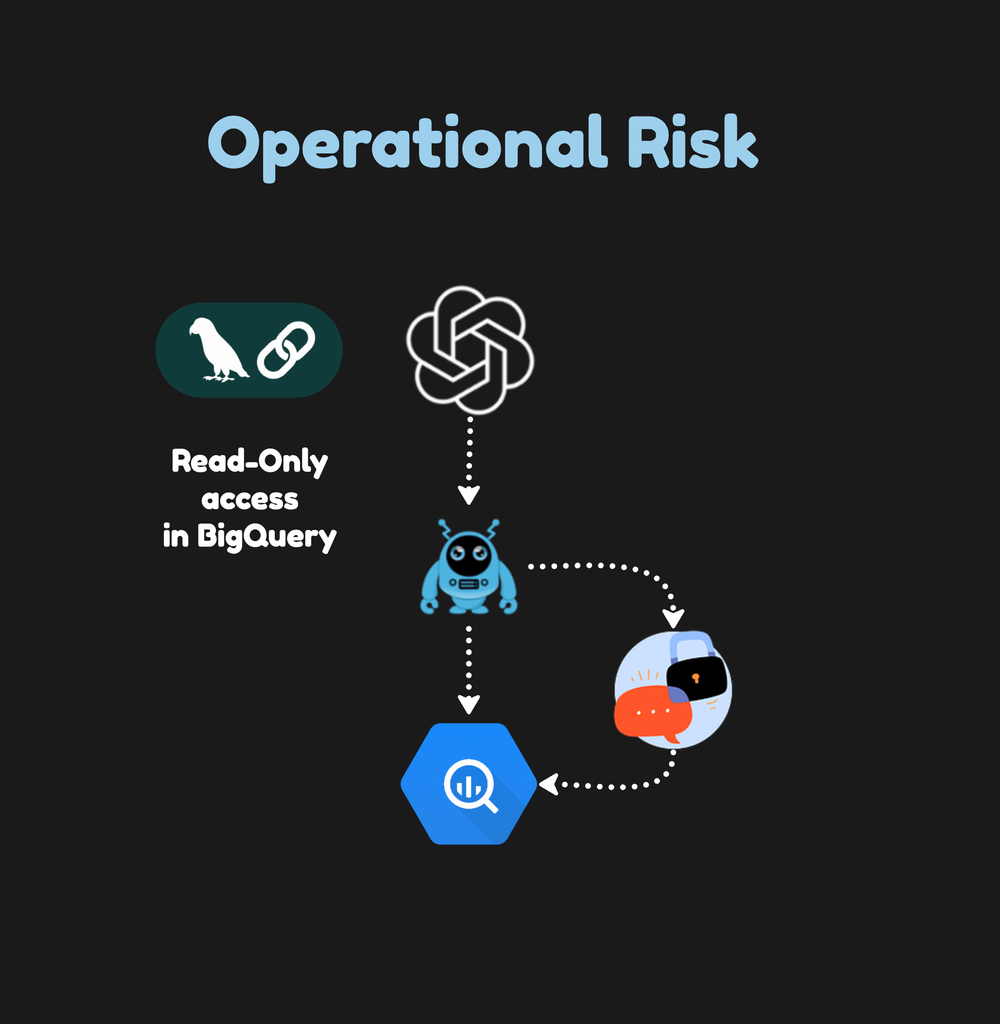

**Data Privacy Risks**:
LLMs can access and disclose sensitive information within files or databases they query. This poses a significant risk, especially with regulations such as GDPR and HIPAA that govern data privacy. To mitigate these risks:

Control data access tightly.
Use data masking and privacy-enhancing technologies to ensure LLMs can perform tasks without exposing sensitive information.
Implement strict access controls and encrypt sensitive data at rest and in transit to protect against unauthorized access.

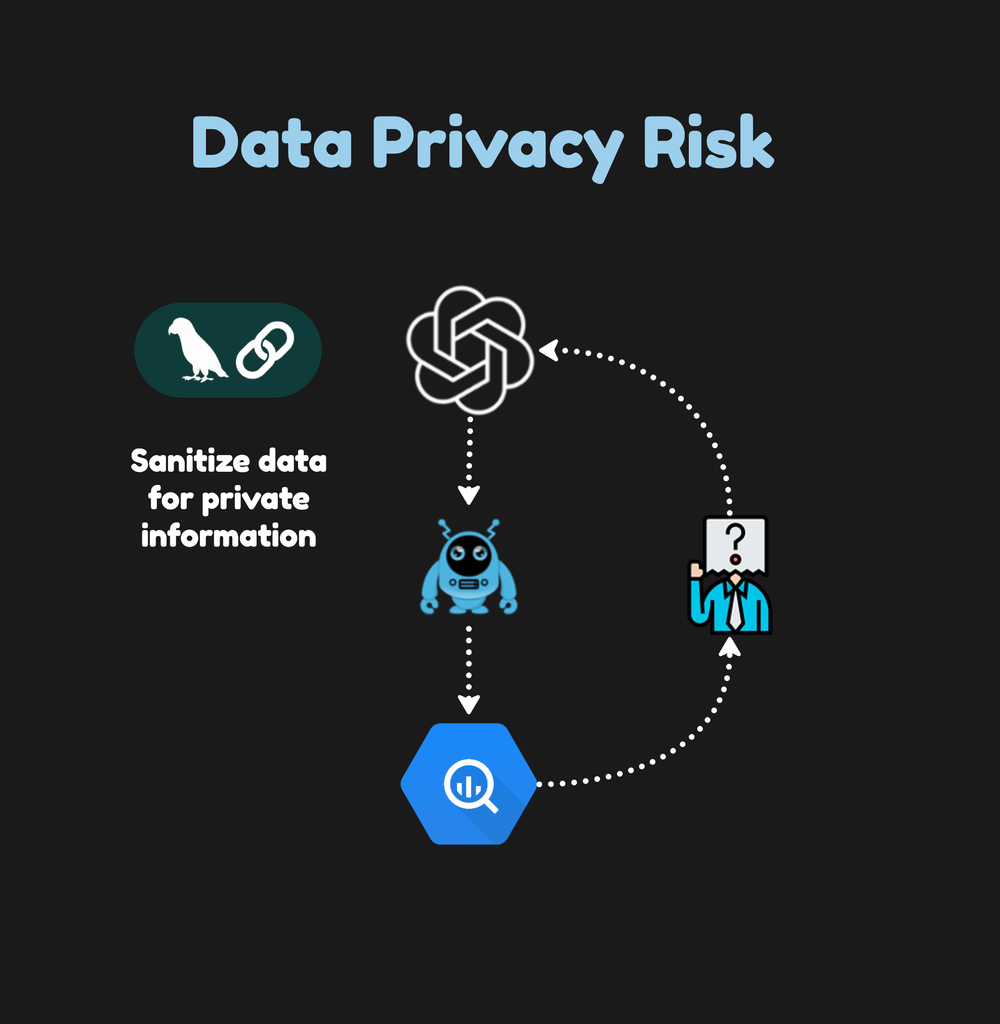

**Security Risks**:
Security risks involve LLMs potentially interacting with external APIs in a manner that compromises data integrity or security. To safeguard against these risks:

Adopt the principle of least privilege, ensuring that LLMs have the minimum level of access required to perform their duties.
Validate and sanitize inputs, conduct regular security audits, and use secure coding practices to enhance the security posture of your LLM integrations.

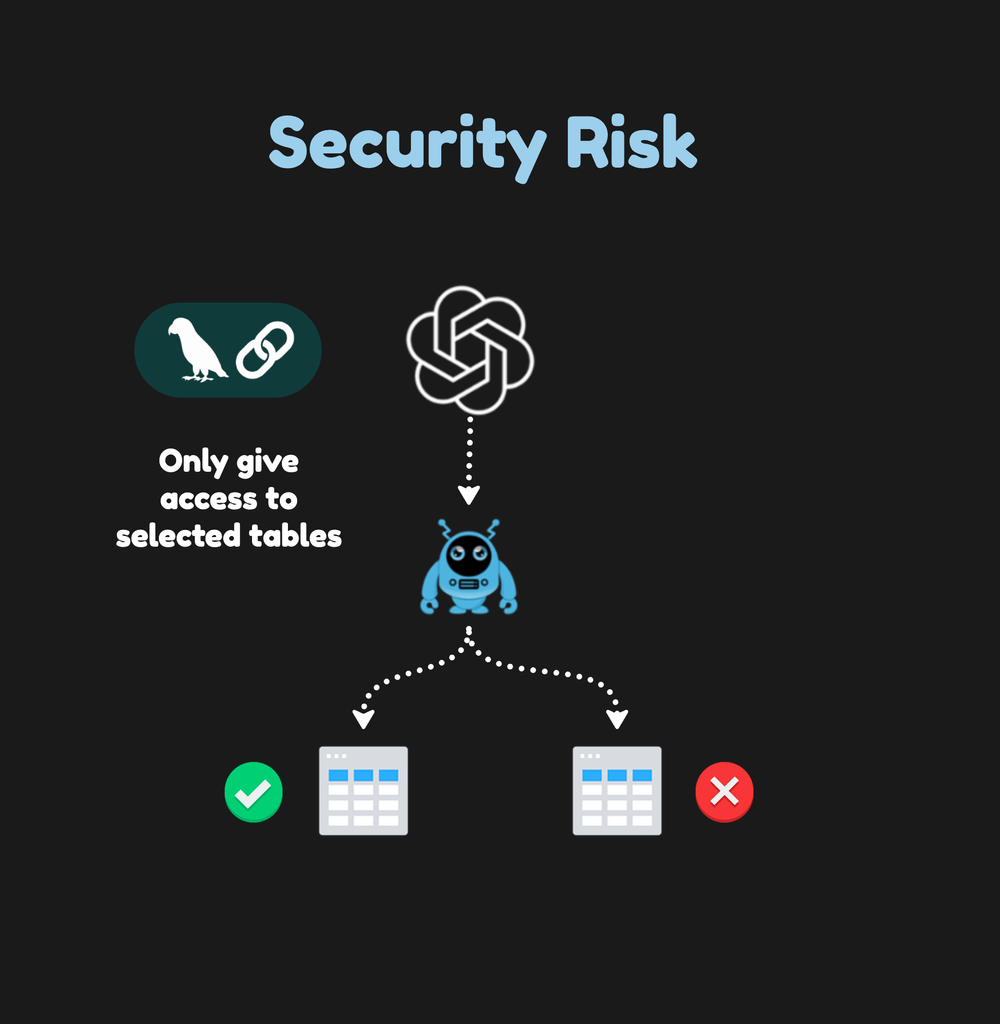

**Financial Risks**:
The pay-as-you-go model of cloud-based databases like Google BigQuery introduces financial risks, particularly if an LLM initiates extensive or inefficient queries that result in high data processing costs. To mitigate these risks:

Establish cost control measures such as setting up budget alerts and caps on query amounts.
Optimize queries for efficiency, potentially using pre-aggregated data or materialized views to reduce the volume of data processed.
Monitor and analyze query patterns to identify and prevent inefficient or runaway queries that could lead to unexpected costs.

Implementing robust safeguards ensures data protection, cost-effectiveness, and compliance with organizational goals and regulations. By addressing these risks, organizations can safely harness the power of LLMs in data analysis while minimizing potential drawbacks.

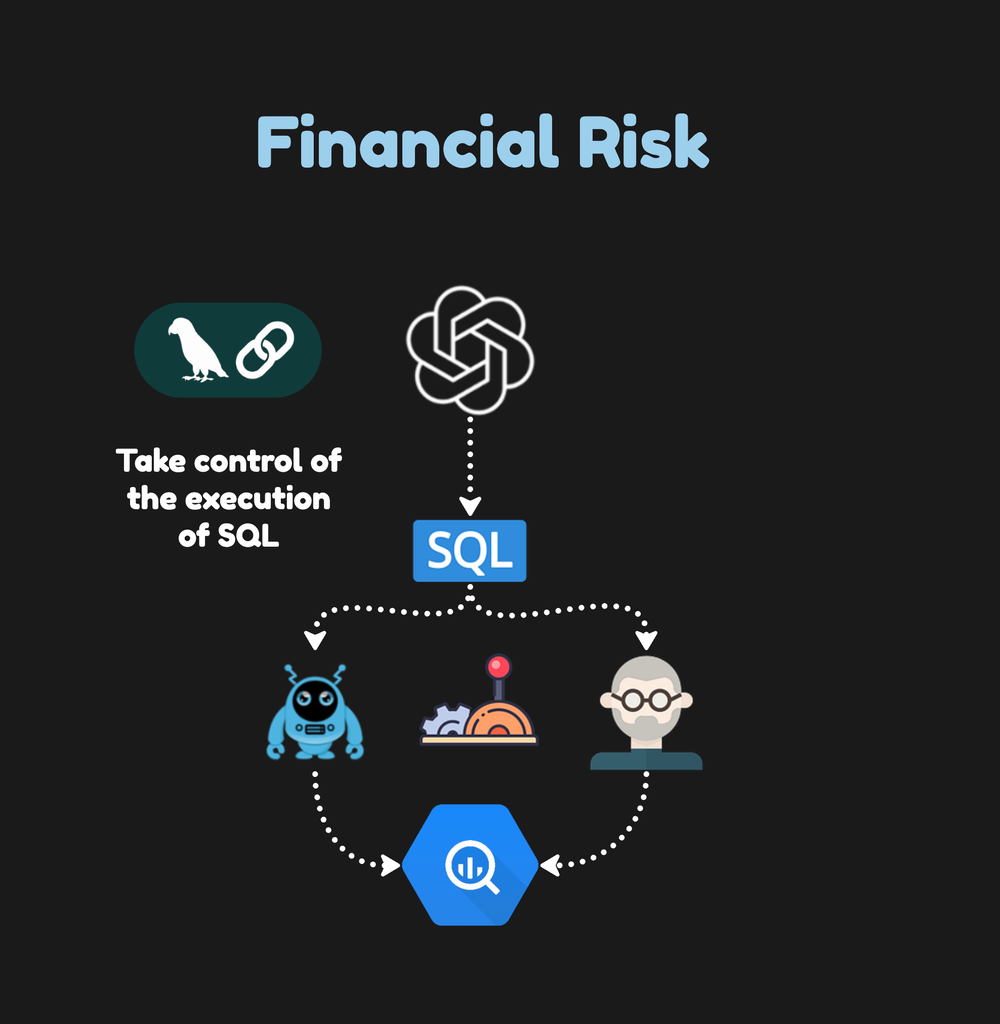

## A More Robust Text-to-SQL Approach

A good starting point for managing the risks is to separate the SQL generation from execution. This will not only give you better control over the risks but also allow you to build more robust and tailored automated chat-to-SQL solutions with LangChain for your specific use case.

This separation acts as a buffer, ensuring that every SQL query generated by the LLM is reviewed for accuracy, relevance, and safety before it's run against your database. This step can be automated or manually reviewed, depending on the complexity of the query and the sensitivity of the data.

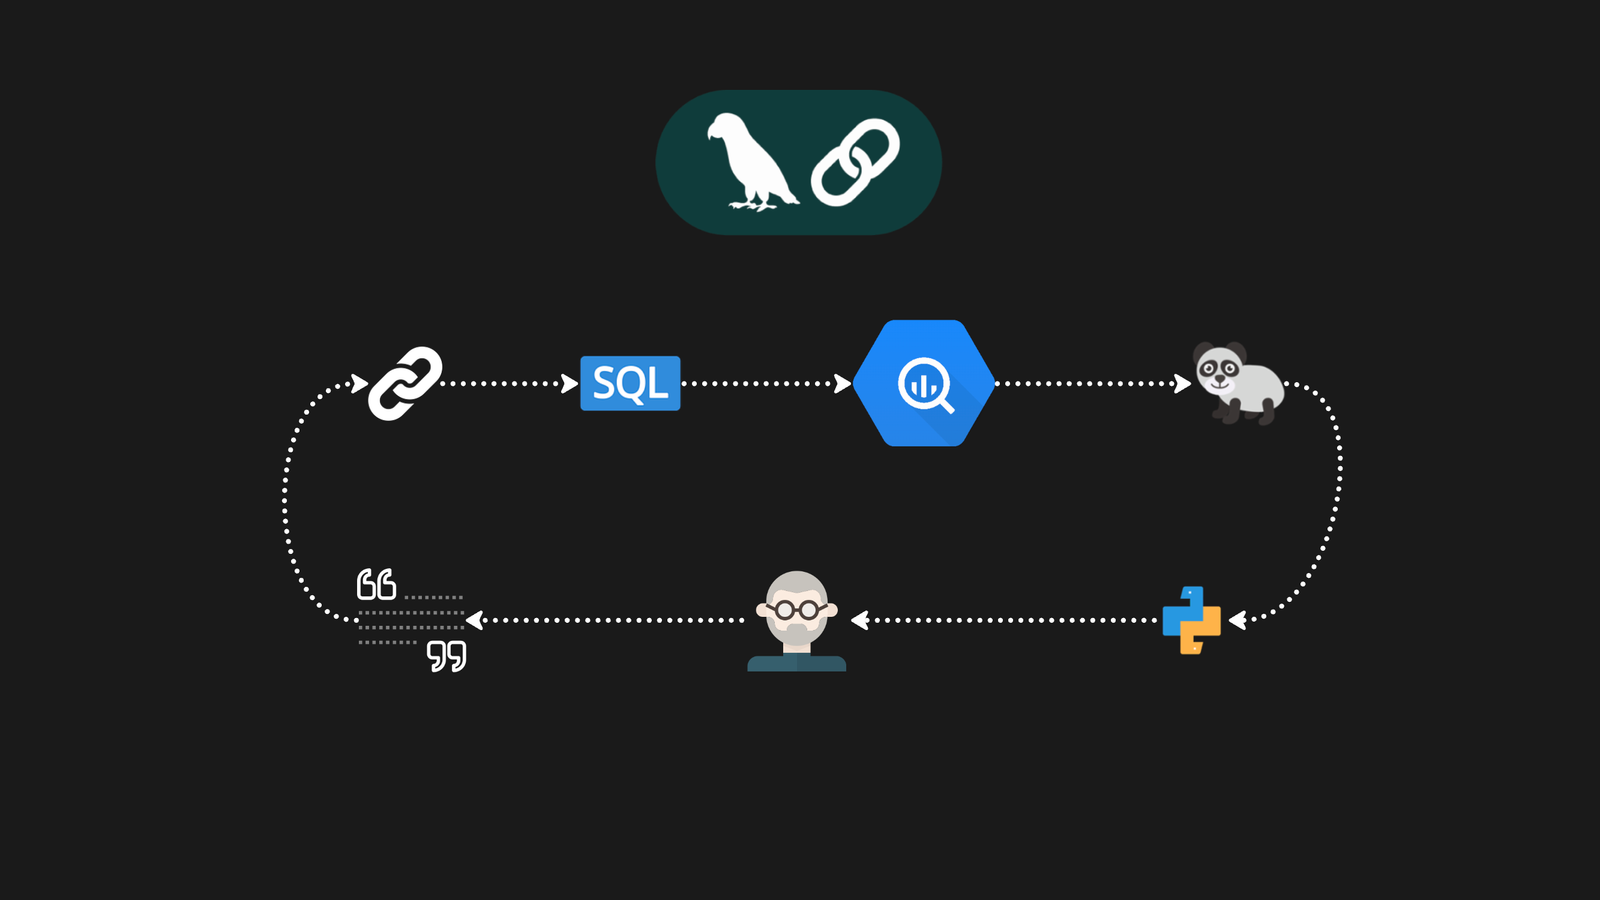

To start working with Google BigQuery in your application, you must first set up the BigQuery client and authenticate your access. Here’s how you can do that:

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

This code snippet sets up your application with the necessary permissions to interact with BigQuery, allowing you to query data and access schema information.

We want to assemble a chain that allows us to write more advanced queries, such as working with nested data. Consider the following query that both aggregates data and handles nested fields effectively:

In [ ]:
credentials = service_account.Credentials.from_service_account_file(service_account_path)
gbq_client = bigquery.Client(credentials=credentials, project=credentials.project_id)

In [ ]:
query = """
SELECT
    c.id AS CustomerID,
    c.firstName AS FirstName,
    c.lastName AS LastName,
    ARRAY_LENGTH(c.tags) AS NumberOfTags,
    c.amountSpent.amount AS TotalAmountSpent,
    c.amountSpent.currencyCode AS Currency
FROM
    `rabbitpromotion.gbq_chat.customers` c
ORDER BY
    CAST(c.amountSpent.amount AS FLOAT64) DESC
"""

df = gbq_client.query(query).to_dataframe()

In [ ]:
df

,CustomerID,FirstName,LastName,NumberOfTags,TotalAmountSpent,Currency
0,gid://shopify/Customer/6056367587577,Chadwick,Medina,1,240.1,DKK
1,gid://shopify/Customer/6056367653113,Forrest,Richardson,1,229.9,DKK
2,gid://shopify/Customer/6056367816953,Vincent,Ferrell,2,140.4,DKK
3,gid://shopify/Customer/6056367751417,Stephen,Long,2,0.7,DKK
4,gid://shopify/Customer/6056367554809,Cedric,Cochran,2,0.4,DKK
5,gid://shopify/Customer/6056367849721,Connor,Ware,1,0.3,DKK
6,gid://shopify/Customer/6056367718649,Darius,Randolph,2,0.2,DKK
7,gid://shopify/Customer/6056367685881,Colt,Patton,2,0.0,DKK
8,gid://shopify/Customer/6368454410489,d,d,0,0.0,DKK
9,gid://shopify/Customer/6727568752889,s,d,0,0.0,DKK


Writing such queries is essential when analyzing e-commerce or Google Analytics 4 data, where the ability to dissect and interpret complex, nested information can yield important insights into customer behavior and business performance.

#Extracting Schema Information


To assist in crafting queries, it's helpful to have a function that extracts and describes a dataset's schema:

In [ ]:
# Functions that will extract the Schema information from BigQuery

def build_schema_desc(fields, prefix=""):
    """Build schema description, including nested fields."""
    desc = []
    for f in fields:
        d = f"{prefix}Name: {f.name}, Type: {f.field_type}, Mode: {f.mode}"
        desc.append(d)
        if f.field_type == 'RECORD':
            sub_desc = build_schema_desc(f.fields, prefix + "\t")
            desc.extend(sub_desc)
    return desc


def fetch_schemas(dataset_id, client):
    """Fetch schema descriptions for all tables in a dataset."""
    schemas = []

    tables = client.list_tables(dataset_id)
    for table in tables:
        ref = client.get_table(table)

        schema_desc = [f"Schema for {table.table_id}:"]
        schema_desc += build_schema_desc(ref.schema)
        schema_desc.append("")  # For newline

        schemas += schema_desc

    return "\n".join(schemas)

With these functions, you can easily retrieve and print the schema descriptions for all tables within a dataset, making it easier to write accurate and efficient queries:

In [ ]:
full_dataset_id = "rabbitpromotion.gbq_chat"

schema_text = fetch_schemas(full_dataset_id,gbq_client)
print(schema_text)

Schema for customers:
Name: id, Type: STRING, Mode: REQUIRED
Name: emailMarketingConsent, Type: RECORD, Mode: NULLABLE
	Name: consentUpdatedAt, Type: TIMESTAMP, Mode: NULLABLE
	Name: marketingOptInLevel, Type: STRING, Mode: NULLABLE
	Name: marketingState, Type: STRING, Mode: NULLABLE
Name: createdAt, Type: TIMESTAMP, Mode: NULLABLE
Name: updatedAt, Type: TIMESTAMP, Mode: NULLABLE
Name: firstName, Type: STRING, Mode: NULLABLE
Name: lastName, Type: STRING, Mode: NULLABLE
Name: numberOfOrders, Type: INTEGER, Mode: NULLABLE
Name: amountSpent, Type: RECORD, Mode: NULLABLE
	Name: amount, Type: STRING, Mode: NULLABLE
	Name: currencyCode, Type: STRING, Mode: NULLABLE
Name: lastOrder, Type: RECORD, Mode: NULLABLE
	Name: id, Type: STRING, Mode: NULLABLE
Name: tags, Type: STRING, Mode: REPEATED

Schema for orders:
Name: id, Type: STRING, Mode: REQUIRED
Name: createdAt, Type: TIMESTAMP, Mode: NULLABLE
Name: currencyCode, Type: STRING, Mode: NULLABLE
Name: customer, Type: RECORD, Mode: NULLABLE
	Na

After getting your BigQuery client ready and figuring out how to pull schema descriptions, the next step involves using GPT-4 to craft SQL queries efficiently. This method is especially useful when working with datasets with detailed structures, such as those found in Google Analytics 4 (GA4), where you often must deal with nested records.

First, we set up a prompt that informs GPT-4 about our dataset's schema and asks it to generate an SQL query based on a question we have. We use the langchain_core library for this:

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

template = """Based on the BigQuery schema below, write a SQL query that answers the user's question:
{schema}

Question: {question}
SQL Query:"""
prompt = ChatPromptTemplate.from_template(template)

Next, we need to combine a few components to create a chain. This chain will take our database schema, combine it with our question, and then use GPT-4 to generate the SQL code.

Incorporating Langchain Expression Language (LCEL) into our workflow significantly simplifies dynamically generating queries tailored to the specific structure of our BigQuery datasets.

By leveraging LCEL, we enable a modular and flexible approach to constructing query generation pipelines.

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [ ]:
def get_schema(_):
    return fetch_schemas(full_dataset_id,gbq_client)

sql_response = (
    RunnablePassthrough.assign(schema=get_schema)
    | prompt
    | llm_claude3.bind(stop=["\nSQLResult:"])
    | StrOutputParser()
)

In this setup, the RunnablePassthrough component is initially assigned to fetch the database schema via the get_schema function. The prompt Then, it leverages this schema, coupled with a user-defined question, to instruct the LLM in generating a query. The LLM's response is then parsed through the StrOutputParser, converting the model's output into a clean, executable SQL query.

#Running Custom Queries
Now, you can ask complex questions about your data. For instance, if you want to analyze customer order habits, you might input something like this:

In [ ]:
res=sql_response.invoke({"question": "How many customers are in the dataset? Only return sql"})

In [ ]:
print(res)

SELECT COUNT(*) AS num_customers
FROM customers;


In [ ]:
sql_prompt="""
Utilize createdAt from the orders schema to understand how often customers are placing orders and to understand recency.
Refer to tables as rabbitpromotion.shopify_gbq.table ( table is customers, orders, products etc).
Only return clean SQL that can be directly executed.
"""
res=sql_response.invoke({"question": sql_prompt})
print(res)

SELECT
  customer.id AS customer_id,
  MAX(orders.createdAt) AS most_recent_order_date,
  COUNT(orders.id) AS total_orders,
  TIMESTAMP_DIFF(CURRENT_TIMESTAMP(), MAX(orders.createdAt), DAY) AS days_since_last_order
FROM
  rabbitpromotion.shopify_gbq.orders AS orders
JOIN
  rabbitpromotion.shopify_gbq.customers AS customers
ON
  orders.customer.id = customers.id  
GROUP BY
  customer.id


In [ ]:
gbq_client.query(res).to_dataframe()

,customer_id,most_recent_order_date,total_orders,days_since_last_order
0,gid://shopify/Customer/6056367554809,2022-02-15 17:00:48+00:00,3,769
1,gid://shopify/Customer/6056367587577,2023-01-31 13:11:38+00:00,3,419
2,gid://shopify/Customer/6056367620345,2022-02-15 16:59:54+00:00,1,769
3,gid://shopify/Customer/6056367653113,2023-02-01 16:20:02+00:00,7,418
4,gid://shopify/Customer/6056367718649,2022-02-15 16:56:41+00:00,1,769
5,gid://shopify/Customer/6056367751417,2022-02-15 16:58:54+00:00,3,769
6,gid://shopify/Customer/6056367784185,2022-02-15 17:01:07+00:00,1,769
7,gid://shopify/Customer/6056367816953,2023-02-01 16:23:14+00:00,4,418
8,gid://shopify/Customer/6056367849721,2022-02-15 16:57:48+00:00,1,769
9,gid://shopify/Customer/6368454410489,2023-03-13 20:34:19+00:00,67,378


This pipeline simplifies querying datasets, allowing you to bypass the tedious aspects of manually writing SQL queries.

This approach becomes particularly potent when we grant the language model access to knowledge bases that contain information related to the specific business problem we want to solve. This way, the model can generate queries that are not only syntactically accurate but also highly relevant to the intended application.